# Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git # clone
%cd yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/112.6 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print({HOME})

{'/content/yolov5'}


In [ ]:
!pip install roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow


rf = Roboflow(api_key="PREtYuS13VXPKlpKYGKD")
project = rf.workspace("capstone-cra8x").project("citypersons-woqjq-ike0o-dtqfy")
version = project.version(1)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


/content/yolov5/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Citypersons-1 in yolov5pytorch:: 100%|██████████| 6962/6962 [00:02<00:00, 2401.86it/s]


### Train On Custom Data


In [ ]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models

for x in p5:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 3.87M/3.87M [00:00<00:00, 52.1MB/s]

100%|██████████| 14.1M/14.1M [00:00<00:00, 135MB/s]

100%|██████████| 40.8M/40.8M [00:00<00:00, 62.6MB/s]

100%|██████████| 89.3M/89.3M [00:00<00:00, 193MB/s]

100%|██████████| 166M/166M [00:00<00:00, 225MB/s]



In [ ]:
%cd {HOME}#running the training code is in a different dir than the paths defined in citypersons data yaml file

!python train.py --img 640 --batch 16 --epochs 10 --data {dataset.location}/data.yaml --weights yolov5s.pt

[Errno 2] No such file or directory: '/content/yolov5#running the training code is in a different dir than the paths defined in citypersons data yaml file'
/content/yolov5
2025-07-30 09:01:59.638201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753866119.661308    6130 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753866119.668056    6130 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/datasets/Citypersons-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evo

In [ ]:
print(dataset.location)

/content/yolov5/datasets/Citypersons-1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path that contains folder you want to copy - the train folder, not everything
%cd /content/drive/MyDrive/MLPR_new_runs/yolov5
%cp -av /content/yolov5/runs/train/exp2 /content/drive/MyDrive/MLPR_new_runs/yolov5

/content/drive/MyDrive/MLPR_new_runs/yolov5
'/content/yolov5/runs/train/exp2' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2'
'/content/yolov5/runs/train/exp2/weights' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2/weights'
'/content/yolov5/runs/train/exp2/weights/last.pt' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2/weights/last.pt'
'/content/yolov5/runs/train/exp2/weights/best.pt' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2/weights/best.pt'
'/content/yolov5/runs/train/exp2/hyp.yaml' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2/hyp.yaml'
'/content/yolov5/runs/train/exp2/opt.yaml' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2/opt.yaml'
'/content/yolov5/runs/train/exp2/events.out.tfevents.1753866122.4aa891275524.6130.0' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2/events.out.tfevents.1753866122.4aa891275524.6130.0'
'/content/yolov5/runs/train/exp2/labels_correlogram.jpg' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/exp2/labels_corre

### Validate Your Custom Model


In [ ]:
%cd {HOME}

/content/yolov5


In [ ]:
!python val.py --weights runs/train/exp2/weights/best.pt --data {dataset.location}/data.yaml --img 640

val: data=/content/yolov5/datasets/Citypersons-1/data.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/datasets/Citypersons-1/valid/labels.cache... 342 images, 13 backgrounds, 0 corrupt: 100% 342/342 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 11/11 [00:11<00:00,  1.06s/it]
                   all        342       3414      0.714      0.201      0.234      0.125
                  None        342       1202      0.441     0.0474     

### Infer With Your Custom Model

In [ ]:
import os
#Get the path of an image from the test or validation set
if os.path.exists(os.path.join(dataset.location, "test")):
  split_path = os.path.join(dataset.location, "test", "images")
else:
  split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

#Infer
!python detect.py --img 640 --weights runs/train/exp2/weights/best.pt --source {example_image_path}

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/datasets/Citypersons-1/test/images/frankfurt_000001_082466_leftImg8bit_png.rf.ca10bdf1d5368b8cf9ff7524fe982234.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/datasets/Citypersons-1/test/images/frankfurt_000001_082466_leftImg8bit_png.rf.ca10bdf1d5368b8cf9ff7524fe982234.jpg: 320x640 (no detections), 29.8ms
Speed: 0.5ms pre-process, 29

In [ ]:
#Infer
!python detect.py --img 640 --weights runs/train/exp2/weights/best.pt --source "/content/yolov5/download (1).png"

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/download (1).png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/download (1).png: 384x640 1 None, 3 peds, 32.0ms
Speed: 0.7ms pre-process, 32.0ms inference, 178.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


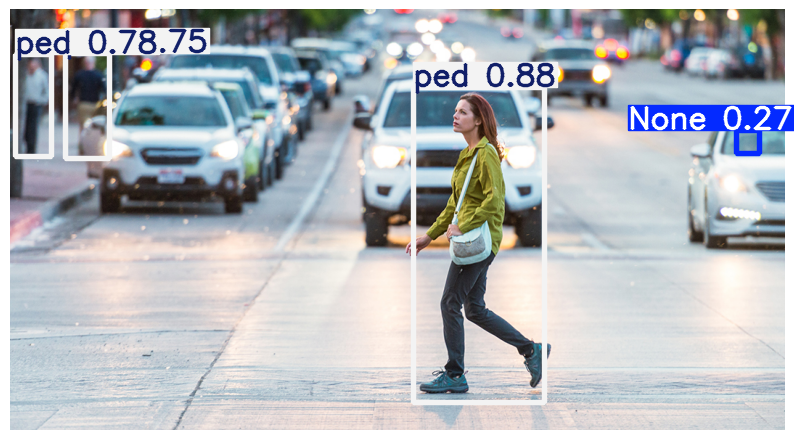

In [ ]:
display.Image(filename=f'runs/detect/exp2/download (1).png', width=600)

In [ ]:
#Infer with original pretrained weights
%cd {HOME}

!python detect.py --img 640 --weights yolov5s.pt --source "/content/yolov5/download (1).png"

/content/yolov5
detect: weights=['yolov5s.pt'], source=/content/yolov5/download (1).png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/download (1).png: 384x640 5 persons, 11 cars, 2 handbags, 29.6ms
Speed: 0.5ms pre-process, 29.6ms inference, 135.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


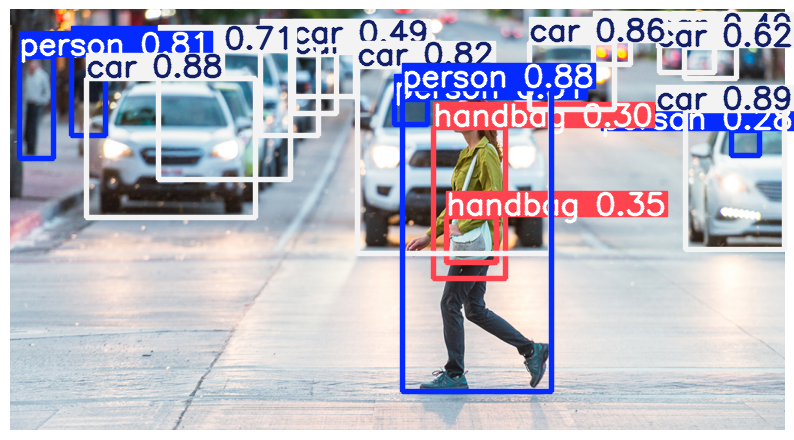

In [ ]:
display.Image(filename=f'runs/detect/exp3/download (1).png', width=600)

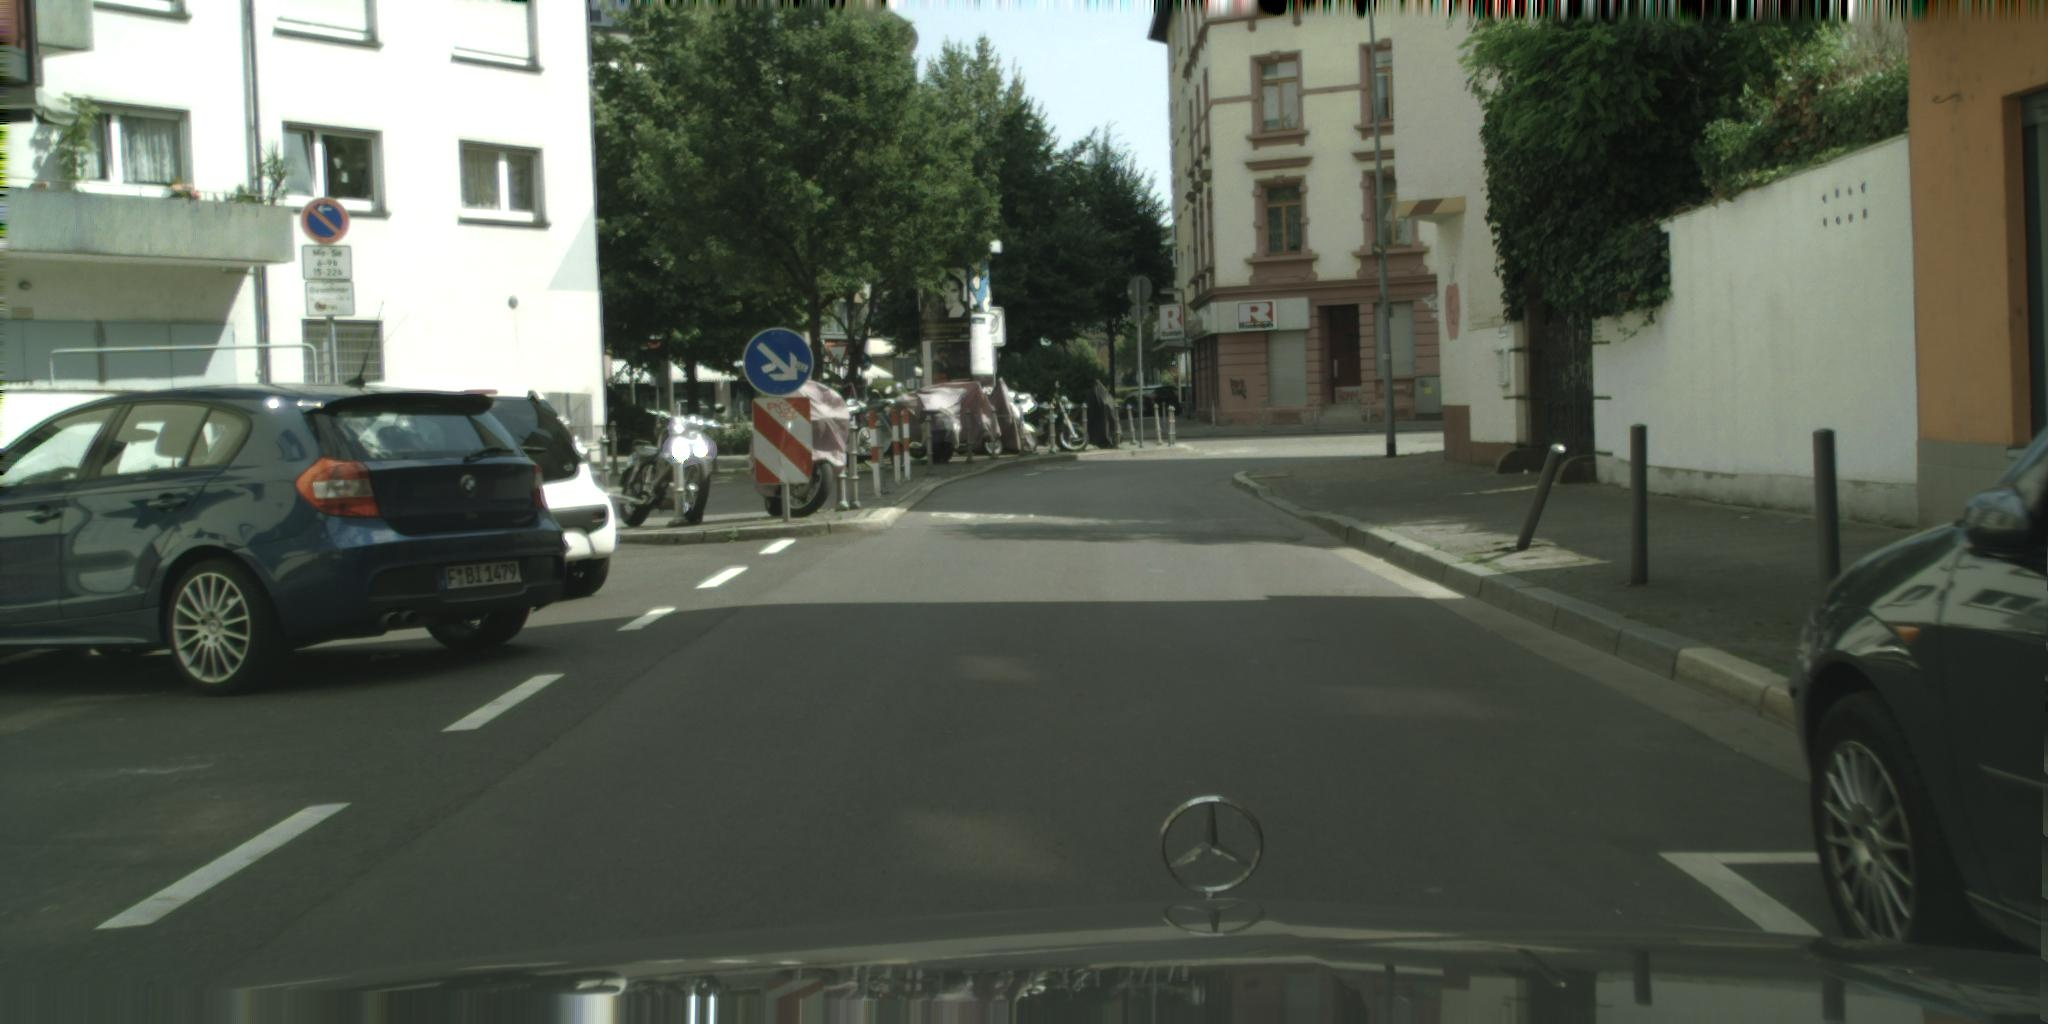

In [ ]:
display.Image(filename=f'runs/detect/exp/{example_image_name}', width=600)

In [ ]:
%cd /content/drive/MyDrive/MLPR_new_runs/yolov5
%cp -av /content/yolov5/runs/ /content/drive/MyDrive/MLPR_new_runs/yolov5

/content/drive/MyDrive/MLPR_new_runs/yolov5
'/content/yolov5/runs/' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs'
'/content/yolov5/runs/train' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs/train'
'/content/yolov5/runs/train/exp' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs/train/exp'
'/content/yolov5/runs/train/exp/weights' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs/train/exp/weights'
'/content/yolov5/runs/train/exp/hyp.yaml' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs/train/exp/hyp.yaml'
'/content/yolov5/runs/train/exp/opt.yaml' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs/train/exp/opt.yaml'
'/content/yolov5/runs/train/exp/events.out.tfevents.1753865933.4aa891275524.5283.0' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs/train/exp/events.out.tfevents.1753865933.4aa891275524.5283.0'
'/content/yolov5/runs/train/exp2' -> '/content/drive/MyDrive/MLPR_new_runs/yolov5/runs/train/exp2'
'/content/yolov5/runs/train/exp2/weights' -> '/cont